# Cancer Genomics Cloud Data

In [32]:
import os, pandas as pd

## Metadata

In [33]:
metadata = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd()))+"\\Data\\GeneExpression\\manifest_20240128_210036.csv")
metadata.head()

,id,name,size,project,ethnicity,gender,race,vital_status,disease_type,sample_id,case_uuid,sample_type,primary_site,aliquot_uuid,sample_uuid,aliquot_id,reference_genome,case_id,investigation,experimental_strategy
0,65b70596d1655c1866a539e9,ffb57bfc-174e-4564-aa4a-a9dd5a235004.mirnaseq....,50320,mandlgeorge/data495-application2,not hispanic or latino,male,white,Alive,Myeloid Leukemias,TARGET-20-PAVXEL-03A,39427106-8e41-45d5-87eb-45ccb30e14dc,Primary Blood Derived Cancer - Peripheral Blood,Hematopoietic and reticuloendothelial systems,7a3c572b-c0db-4ebf-bdff-c449ca61c378,09debe81-6686-44dd-9dd0-9d8fa4e67c63,TARGET-20-PAVXEL-03A-01R,GRCh38.d1.vd1,TARGET-20-PAVXEL,TARGET-AML,miRNA-Seq
1,65b70596d1655c1866a54122,ffa023ca-ee09-4342-a78b-842388f0ed1d.mirnaseq....,50261,mandlgeorge/data495-application2,not hispanic or latino,male,white,Alive,Myeloid Leukemias,TARGET-20-PAXLXJ-09A,c3d45232-09a0-4676-9a69-42cdc5d36622,Primary Blood Derived Cancer - Bone Marrow,Hematopoietic and reticuloendothelial systems,fc511ac2-bb7b-4321-ac0e-ab34af1afda9,057e3f93-1979-4db0-8aaa-ccfa64be87d2,TARGET-20-PAXLXJ-09A-01R,GRCh38.d1.vd1,TARGET-20-PAXLXJ,TARGET-AML,miRNA-Seq
2,65b70597d1655c1866a54915,ff9dbab7-a625-42a3-a6bf-ae633e46ba5a.mirnaseq....,50455,mandlgeorge/data495-application2,not hispanic or latino,female,white,Alive,Myeloid Leukemias,TARGET-20-PARWCG-09A,634825e4-9ba3-5d55-802d-b7ca6d439691,Primary Blood Derived Cancer - Bone Marrow,Hematopoietic and reticuloendothelial systems,7ca06c18-5c6c-489f-949a-31c91d9e5820,7147448b-8c1e-5146-8624-d5714d918efa,TARGET-20-PARWCG-09A-01R,GRCh38.d1.vd1,TARGET-20-PARWCG,TARGET-AML,miRNA-Seq
3,65b70597d1655c1866a54508,ff7a5ce9-d259-46db-8c72-e45bb561a2cc.mirnaseq....,50235,mandlgeorge/data495-application2,not hispanic or latino,female,white,Alive,Myeloid Leukemias,TARGET-20-PAWWFF-09A,68ab1839-6fb1-42eb-b8f4-c263f858b7a1,Primary Blood Derived Cancer - Bone Marrow,Hematopoietic and reticuloendothelial systems,81e80920-0f49-4da5-8694-54100362808b,499cc9f5-93df-4742-89a7-3e0b7c6c32bf,TARGET-20-PAWWFF-09A-01R,GRCh38.d1.vd1,TARGET-20-PAWWFF,TARGET-AML,miRNA-Seq
4,65b70596d1655c1866a539dc,ff383dcc-4466-4afb-a29c-104e176f8bf0.mirnaseq....,50363,mandlgeorge/data495-application2,Unknown,male,Unknown,Dead,Myeloid Leukemias,TARGET-15-SJMPAL043772-04B,d982a07f-f9c3-4e29-a1b0-d0b6fad4bddd,Recurrent Blood Derived Cancer - Bone Marrow,Hematopoietic and reticuloendothelial systems,72515c31-eaf7-4b4f-8cb8-c1605cc24da0,af82c3d6-6977-41ce-a680-0bdb4e172a1b,TARGET-15-SJMPAL043772-04B-01R,GRCh38.d1.vd1,TARGET-15-SJMPAL043772,TARGET-ALL-P3,miRNA-Seq


In [34]:
metadata.groupby("id").size().sort_values(ascending=True) 
# ID are unique 

id
65b70596d1655c1866a538a7    1
65b70597d1655c1866a546a3    1
65b70597d1655c1866a54697    1
65b70597d1655c1866a54663    1
65b70597d1655c1866a5465a    1
                           ..
65b70596d1655c1866a53e43    1
65b70596d1655c1866a53e0f    1
65b70596d1655c1866a53e04    1
65b70596d1655c1866a53f78    1
65b70598d1655c1866a54b53    1
Length: 100, dtype: int64

In [35]:
metadata2 = metadata.loc[:, ["name", "disease_type", "id", "vital_status"]]

## Data Mining



In [6]:
directory = os.path.dirname(os.path.dirname(os.getcwd())) + "\\Data\\GeneExpression\\Files\\"
master = pd.DataFrame()

for file in os.listdir(directory):
    tsv_file_path = directory + file

    df = pd.read_csv(tsv_file_path, sep='\t')
    df = pd.DataFrame(df.set_index("miRNA_ID")["reads_per_million_miRNA_mapped"]).rename(columns={"reads_per_million_miRNA_mapped":file}).T

    master = pd.concat([master,df])

master.head()

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
f08d92a5-69c3-4a23-a154-79104f006dea.mirnaseq.mirnas.quantification.txt,11641.294948,11892.667729,11671.251289,5763.339689,1654.111052,1302.449647,54.702885,13704.375189,14125.066425,1960.186719,...,0.0,104.195972,0.0,0.000000,0.000000,0.0,14.326946,157.596407,408.969189,346.451606
f0d018a4-38f6-4a29-9727-ac1511a69de0.mirnaseq.mirnas.quantification.txt,11842.156008,11961.829970,11918.492887,10714.596685,69.577885,3454.641382,366.178468,8467.429797,8706.777721,3760.784075,...,0.0,47.312962,0.0,1.987940,0.795176,0.0,0.795176,340.335254,10.337286,6190.046228
f100f116-b36d-439c-b2a5-2004032ecbeb.mirnaseq.mirnas.quantification.txt,37534.011170,37415.628431,37585.564943,57314.907633,270.179961,3025.920092,334.144828,15394.529572,15766.385030,1650.675450,...,0.0,63.964867,0.0,4.773498,0.954700,0.0,0.000000,205.260394,9.546995,116.473340
f112b347-4b0d-4ec8-9c11-6135485a6b7d.mirnaseq.mirnas.quantification.txt,13161.590786,12961.200888,13157.609530,9491.757251,106.609195,2030.883047,291.516430,10578.197845,10875.907339,3931.269362,...,0.0,66.796633,0.0,0.884724,0.884724,0.0,83.606381,172.521104,23.887537,1817.222295
f15aec4b-c641-49b1-adbc-a73a8cdb5e10.mirnaseq.mirnas.quantification.txt,34110.670151,33817.740079,34240.388730,27386.569342,819.247260,734.185896,910.688226,22288.203850,23086.185769,1324.299108,...,0.0,22.860242,0.0,0.531634,0.000000,0.0,1.594901,94.099134,90.909333,4056.363786


In [36]:
df = metadata2.set_index("name").join(master).set_index("id")

In [9]:
df.shape

(100, 1882)

In [38]:
df

,disease_type,vital_status,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
id,,,,,,,,,,,,,,,,,,,,,
65b70596d1655c1866a539e9,Myeloid Leukemias,Alive,7020.927009,7186.466964,7174.124072,6263.654324,47.919460,1783.184771,2194.130447,6321.012466,...,0.0,140.854172,0.000000,0.726052,4.356315,0.0,7.260524,191.677842,13.794996,33569.760207
65b70596d1655c1866a54122,Myeloid Leukemias,Alive,45817.398688,45747.549913,45912.544047,19440.235689,538.590693,837.807745,2739.959805,39379.984512,...,0.0,42.853168,0.000000,15.857560,0.000000,0.0,0.000000,124.406333,78.532677,3235.130989
65b70597d1655c1866a54915,Myeloid Leukemias,Alive,21823.174066,21846.137470,21803.859054,5559.719014,2416.093440,1142.804900,185.209508,28576.346235,...,0.0,30.904020,0.000000,0.643834,0.643834,0.0,1.502279,188.857899,406.902928,427.290997
65b70597d1655c1866a54508,Myeloid Leukemias,Alive,44997.738278,44752.288733,45082.020496,26628.473671,1616.604673,1739.441523,856.943936,29890.823146,...,0.0,54.021315,0.000000,0.000000,0.448310,0.0,0.224155,75.091870,231.327790,1826.637754
65b70596d1655c1866a539dc,Myeloid Leukemias,Dead,12301.391449,12231.488818,12319.235015,6025.422851,3619.300705,6902.332964,100.806952,21022.480502,...,0.0,48.931842,0.183954,1.287680,68.982860,0.0,0.367909,1717.213321,281.082159,1.655589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65b70596d1655c1866a53e4e,Myeloid Leukemias,Alive,34110.670151,33817.740079,34240.388730,27386.569342,819.247260,734.185896,910.688226,22288.203850,...,0.0,22.860242,0.000000,0.531634,0.000000,0.0,1.594901,94.099134,90.909333,4056.363786
65b70597d1655c1866a548ac,Myeloid Leukemias,Alive,13161.590786,12961.200888,13157.609530,9491.757251,106.609195,2030.883047,291.516430,10578.197845,...,0.0,66.796633,0.000000,0.884724,0.884724,0.0,83.606381,172.521104,23.887537,1817.222295
65b70597d1655c1866a545a7,Myeloid Leukemias,Alive,37534.011170,37415.628431,37585.564943,57314.907633,270.179961,3025.920092,334.144828,15394.529572,...,0.0,63.964867,0.000000,4.773498,0.954700,0.0,0.000000,205.260394,9.546995,116.473340


## Target Variable Distribution

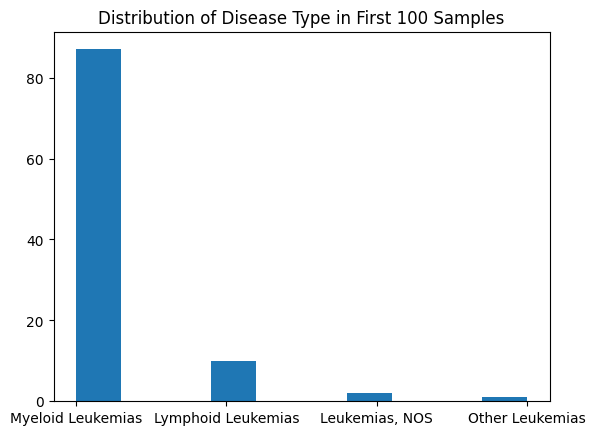

In [50]:
import matplotlib.pyplot as plt

plt.hist(df['disease_type'])
plt.title("Distribution of Disease Type in First 100 Samples")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

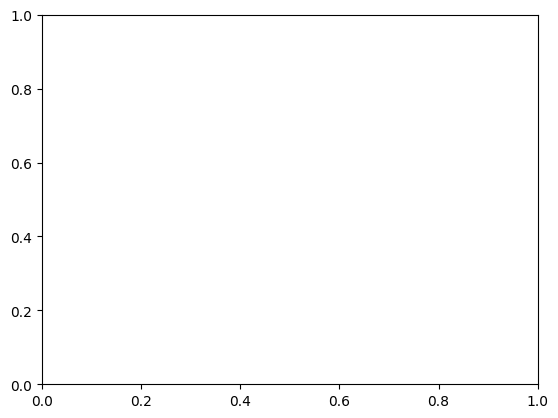

In [64]:
plt.bar(df["vital_status"].unique(), df.groupby("vital_status").size())
plt.title("Distribution of Survival of 100 patient sample")
plt.show()

In [63]:
df["vital_status"].unique()

array(['Alive', 'Dead', nan, 'Unknown'], dtype=object)

## Functions for loading the data

In [28]:
def load_cgc_metadata():
    metadata = pd.DataFrame()

    for file in os.listdir(os.path.dirname(os.path.dirname(os.getcwd()))+"\\Data\\GeneExpression\\"):
        if "manifest" in file:
            if metadata.empty:
                metadata = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd()))+"\\Data\\GeneExpression\\" + file).loc[:, ["name", "disease_type", "id", 'vital_status']]
            else:
                data = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd()))+"\\Data\\GeneExpression\\" + file).loc[:, ["name", "disease_type", "id", 'vital_status']]
                metadata = pd.concat([metadata, data])

    metadata = metadata.reset_index(drop= True).drop_duplicates()

    return metadata

In [29]:
def load_cgc_data():
    import pandas as pd, os

    metadata = load_cgc_metadata()
    
    directory = os.path.dirname(os.path.dirname(os.getcwd())) + "\\Data\\GeneExpression\\Files\\"
    master = pd.DataFrame()

    for file in os.listdir(directory):
        tsv_file_path = directory + file

        df = pd.read_csv(tsv_file_path, sep='\t')
        df = pd.DataFrame(df.set_index("miRNA_ID")["reads_per_million_miRNA_mapped"]).rename(columns={"reads_per_million_miRNA_mapped":file}).T

        master = pd.concat([master,df])
    
    df = metadata.set_index("name").join(master).set_index("id")
        
    return df